In [95]:
import numpy as np
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import TensorDataset,DataLoader

In [96]:
np.random.seed(121119208)

x1 = np.random.normal(1,1,1000)
x2 = np.random.normal(10,4,1000)
x3 = np.random.normal(100,16,1000)
x4 = np.random.normal(-1,16,1000)
x5 = np.random.normal(-10,4,1000)
x6 = np.random.normal(-100,1,1000)

In [97]:
x1.dtype

dtype('float64')

In [98]:
y1 = 2*x1 + 3*x4 + 5*x6
y2 = x1*2 + 2*x2*2 + 3*x3*2 + 4*x4*2 + 5*x5*2 + 6*x6*2
y3 = x1 + 3*x2 * 7*x3 + 7*x4 + 3*x5 * x6  

In [99]:
X = np.array([x1,x2,x3,x4,x5,x6]).T
Y = np.array([y1,y2,y3]).T

In [100]:
X_tr,X_te,Y_tr,Y_te = train_test_split(X,Y,test_size=0.1,shuffle=True)

In [101]:
X_tr = torch.from_numpy(X_tr.astype('float32'))
X_te = torch.from_numpy(X_te.astype('float32'))
Y_tr = torch.from_numpy(Y_tr.astype('float32'))
Y_te = torch.from_numpy(Y_te.astype('float32'))



In [102]:
class Model(nn.Module):
    def __init__(self, inputnodes, hiddennodes, outputnodes):
        super(Model,self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
                nn.Linear(inputnodes, hiddennodes),
                nn.ReLU(),
                nn.Linear(hiddennodes,hiddennodes),
                nn.ReLU(),
                nn.Linear(hiddennodes,outputnodes)
        )
        
    def forward(self,x):
        x = self.flatten(x)
        x = self.model(x)
        return x
    
neuralnet = Model(6,10,3)
epochs = 1000
batchsize = 64
dataset = TensorDataset(X_tr,Y_tr)
dataloader = DataLoader(dataset,batchsize,shuffle=True)
criterion = nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.Adam(neuralnet.parameters(), lr=learning_rate)

for epoch in range(epochs):
    total_loss = 0
    for inputs,targets in dataloader:
        outputs = neuralnet(inputs)
        loss = criterion(outputs,targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    average_loss = total_loss / len(dataloader)
    if (epoch+1)%10 ==0 :
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}')
        
neuralnet.eval()
with torch.no_grad():
    predictions = neuralnet(X_te)
    mse_per_output = mean_squared_error(Y_te.numpy(), predictions.numpy(), multioutput='raw_values')

for i, mse in enumerate(mse_per_output):
    print(f'MSE for y{i+1}: {mse:.4f}')
            
        
    
        
        

Epoch [10/1000], Loss: 11422160.8000
Epoch [20/1000], Loss: 709001.1198
Epoch [30/1000], Loss: 565885.3104
Epoch [40/1000], Loss: 529131.8844
Epoch [50/1000], Loss: 465632.0708
Epoch [60/1000], Loss: 612159.4635
Epoch [70/1000], Loss: 410527.1562
Epoch [80/1000], Loss: 435643.1214
Epoch [90/1000], Loss: 417676.9885
Epoch [100/1000], Loss: 454546.8240
Epoch [110/1000], Loss: 358427.2979
Epoch [120/1000], Loss: 435662.3156
Epoch [130/1000], Loss: 415720.2667
Epoch [140/1000], Loss: 424054.3208
Epoch [150/1000], Loss: 354542.9076
Epoch [160/1000], Loss: 350266.2887
Epoch [170/1000], Loss: 346662.9750
Epoch [180/1000], Loss: 429332.0042
Epoch [190/1000], Loss: 403461.6370
Epoch [200/1000], Loss: 878509.0229
Epoch [210/1000], Loss: 404371.2458
Epoch [220/1000], Loss: 367486.8094
Epoch [230/1000], Loss: 432243.3089
Epoch [240/1000], Loss: 344480.0031
Epoch [250/1000], Loss: 366861.9630
Epoch [260/1000], Loss: 356336.9104
Epoch [270/1000], Loss: 447833.5257
Epoch [280/1000], Loss: 442827.4031

In [103]:
with torch.no_grad():
    print(neuralnet(torch.tensor([X_tr[0].numpy()])))

tensor([[ -484.1244,  -719.6857, 27947.3594]])


In [104]:
Y_tr[0]

tensor([ -482.4635,  -658.9709, 29096.7344])

In [105]:
import matplotlib.pyplot as plt

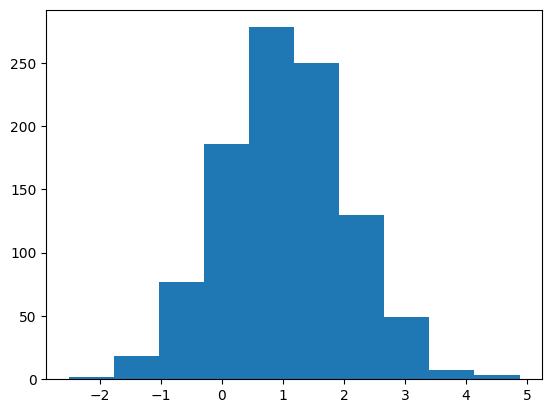

In [106]:
plt.hist(X[:,0])
plt.show()

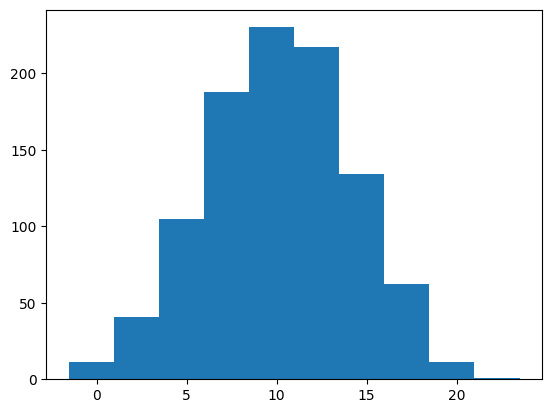

In [107]:
plt.hist(X[:,1])
plt.show()

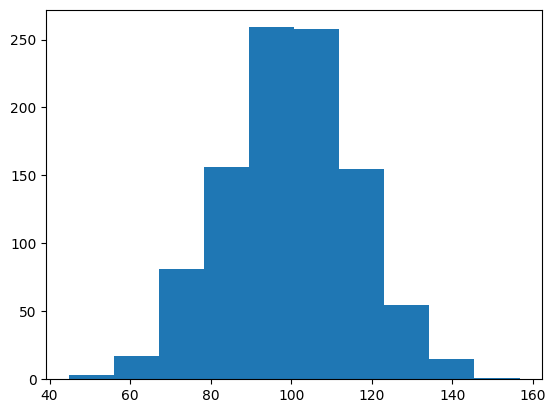

In [108]:
plt.hist(X[:,2])
plt.show()